# Import necessary libaries

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model

# Import Dataset and split it into Train & Test set

In [2]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.cifar10.load_data()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step


# Exploratory Data Analysis

In [3]:
y_train.shape

(50000, 1)

In [4]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

# Data Cleaning & Normalization

normalizing the data from 0-255 value of RGB to 0-1 values.

In [5]:
x_train,x_test = x_train/255,x_test/255

# Data Augmentation

This step creates a data augmentation pipeline using **TehsorFlow's** `ImageDataGenerator`. It generates new, slightly altered versions of image from the training data to improve the model's generalization and prevent overfitting.

In [6]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train)

# CNN Model

Below code defines and creates a **Convolutional Neural Network (CNN)** model for image classification using the CIFAR-10 dataset.
## Step-by-Step Explanation
1. Convolutional Layer 1
  * **64 filters** of size 3x3.
  * **Padding='same'** preserves spatial dimensions.
  * **ReLU activation** introduces non-linearity.
  * **BatchNormalization** stabilizes and speeds up training.
2. Convolutional Layer 2
  * **128 filters** for deep feature extraction.
  * **MaxPooling** halves the spatial dimensions, reducing computation.
  * **Dropout(0.3)** prevents overfitting by random disabling 30% of neurons.
3. Convolutional Layer 3
  * **256 filters** capture complex patterns.
  * **MaxPooling** halves the spatial dimensions, reducing computation.
  * **Dropout(0.4)** increase regularization.
4. Flatten + Dense Layer
  * **Flatten** converts the 2D feature maps to a 1D vector.
  * **Dense(256 units)** learns high-level features.
  * **Dropout(0.5)** aggressively regularizes the network.
5. Output Layer
  * **10 Neurons** for the 10 CIFAR-10 classes.
  * **Softmax** converts output to class probabilities.

## Model Summary
* **Convolution + BatchNorm** for feature extraction.
* **MaxPooling** reduces dimensions.
* **Dropout** controls overfitting.
* **Dense layer** for classification.
* **Softmax output** for multi-class prediction.




In [7]:
def create_model():
  model = models.Sequential([
      # Convolutional layer 1
      layers.Conv2D(64,(3,3), padding='same',activation='relu',input_shape=(32,32,3)),
      layers.BatchNormalization(),

      # Convolutional layer 2
      layers.Conv2D(128,(3,3), padding='same',activation='relu'),
      layers.BatchNormalization(),
      layers.MaxPooling2D(pool_size=(2,2)),
      layers.Dropout(0.3),

      # Convolutional layer 3
      layers.Conv2D(256,(3,3),padding="same",activation='relu'),
      layers.BatchNormalization(),
      layers.MaxPooling2D(pool_size=(2,2)),
      layers.Dropout(0.4),

      # Dense hidden layer
      layers.Flatten(),
      layers.Dense(256,activation='relu'),
      layers.BatchNormalization(),
      layers.Dropout(0.5),

      # Output layer
      layers.Dense(10,activation='softmax')
  ])
  return model
cnn = create_model()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Add Optimizer

Below line of code initializes the **AdamW optimizer** in TensorFlow with a specific learning rate and weight decay value.

In [8]:
optimizer = optimizers.AdamW(learning_rate=0.001,weight_decay=1e-4)

# Compile Model

In [9]:
cnn.compile(
    optimizer = optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Learning Rate Scheduler

The below code will create a **learning rate scheduler** that automatically reduces the learning rate when the model's performance stop improving during traning.
* It **Preventws overshooting** minina by reducing the learning rate.
* **Improves convergence** by allowing finer updates when learning slows down.
* **Reduces manual tuning** of learning rates.

In [10]:
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    verbose=1
)

# Early Stopping

The `EarlyStopping` callback is used to **stop training early** if the model's performance stops improving, preventing overfitting and saving training time.
* If the model's **validation loss** doesn't improve for **10 consecutive epochs**, training will stop early.
* The model will **restore the weights** from the epoch with the **lowest validation loss**.
* It prevents Overfitting, Saves Time, Keeps the Best Model.

In [11]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# Train Model

In [12]:
cnn.fit(
    datagen.flow(x_train,y_train,batch_size=64),
    epochs=50,
    validation_data=(x_test,y_test),
    callbacks=[lr_scheduler,early_stopping]
)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 58s 61ms/step - accuracy: 0.3882 - loss: 1.8671 - val_accuracy: 0.5558 - val_loss: 1.3422 - learning_rate: 0.0010
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 51ms/step - accuracy: 0.5916 - loss: 1.1632 - val_accuracy: 0.6074 - val_loss: 1.1490 - learning_rate: 0.0010
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 51ms/step - accuracy: 0.6341 - loss: 1.0300 - val_accuracy: 0.6276 - val_loss: 1.1640 - learning_rate: 0.0010
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 51ms/step - accuracy: 0.6617 - loss: 0.9535 - val_accuracy: 0.5569 - val_loss: 1.3756 - learning_rate: 0.0010
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 50ms/step - accuracy: 0.6861 - loss: 0.9011 - val_accuracy: 0.7236 - val_loss: 0.8117 - learning_rate: 0.0010
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 50ms/step - accuracy: 0.7073 - loss: 0.8320 - val_accuracy: 0.7023 - val_loss: 0.9270 - learning_rate: 0.0010
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 51ms/step - accuracy: 0.7222 - loss: 0.8040

# Visualize neural network

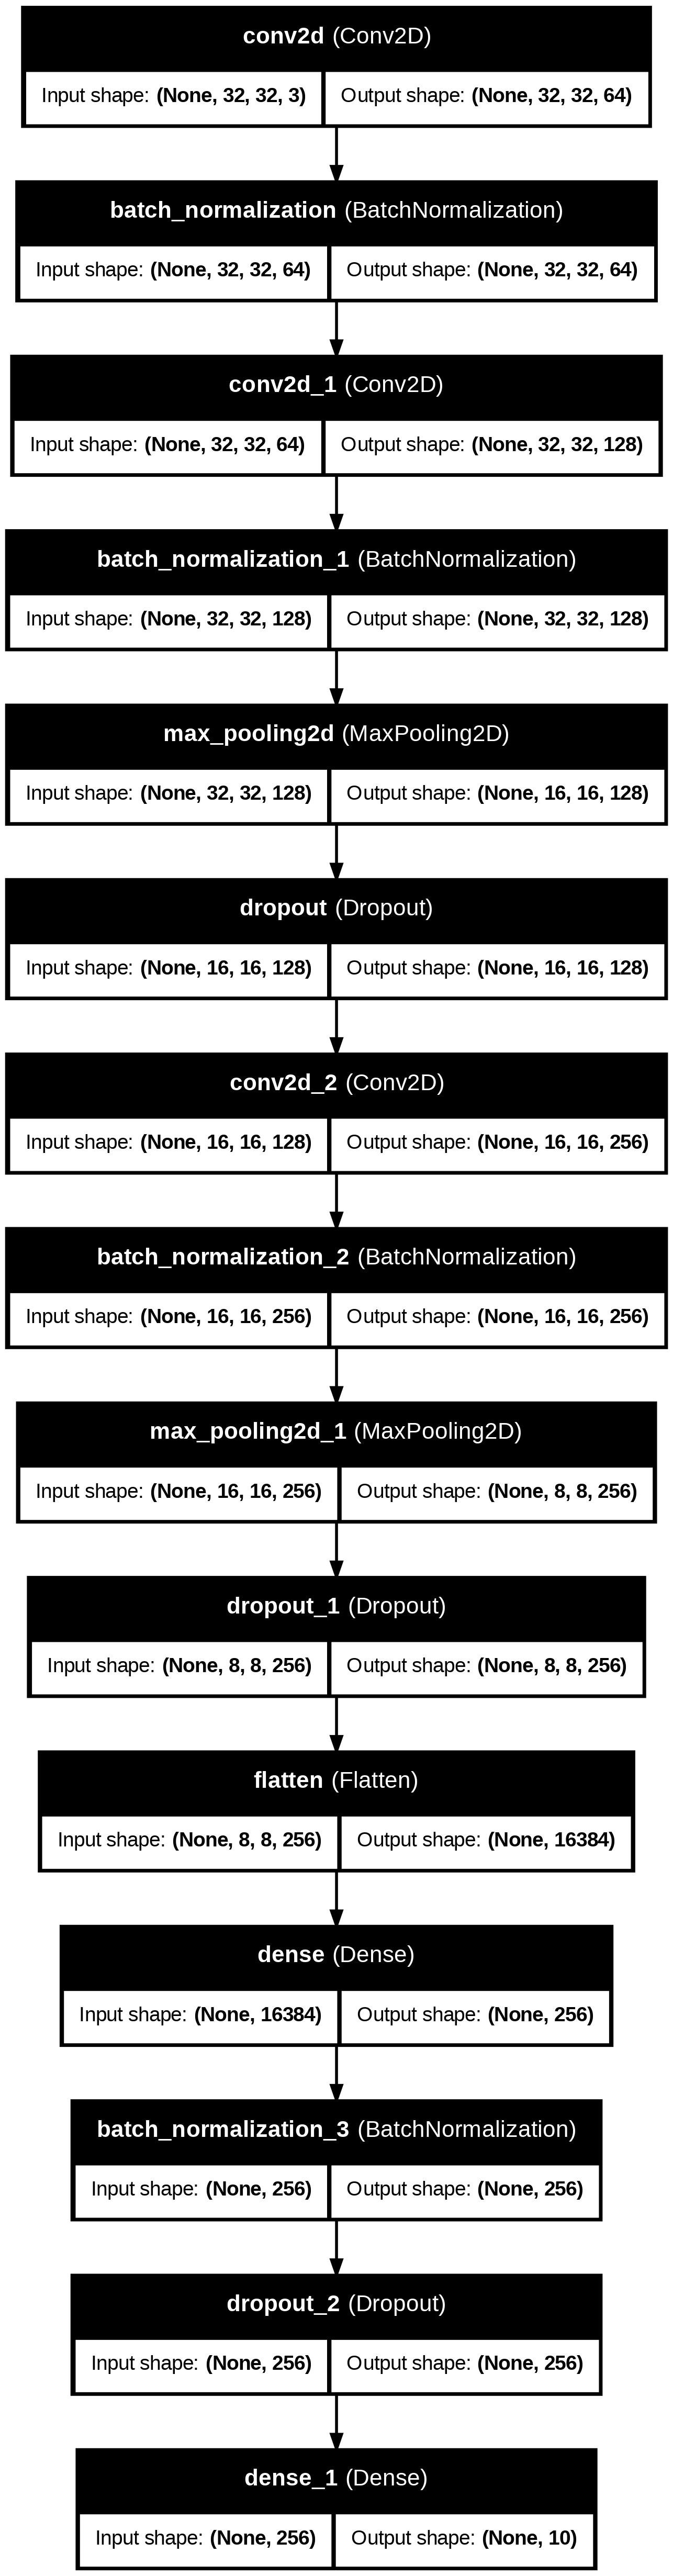

In [13]:
plot_model(cnn,show_shapes=True,show_layer_names=True)

# Evaluate Model

In [14]:
test_loss, test_acc = cnn.evaluate(x_test,y_test,verbose=2)
print(f'Test Accuracy: {test_acc*100:.2f}%')

313/313 - 1s - 3ms/step - accuracy: 0.8566 - loss: 0.4235
Test Accuracy: 85.66%


# Save Model

In [15]:
cnn.save("model.keras")